# Create Group Report

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np

from convnwb.io import get_files, load_nwbfile

from spiketools.plts.data import plot_hist, plot_text
from spiketools.plts.utils import make_grid, get_grid_subplot

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
import sys
sys.path.append('../code')
from reports import create_group_info, create_group_str, create_group_sessions_str

## Settings

In [5]:
# Set which experiment version to analyze
experiment = 'THF'

In [6]:
# Define the base data folder
data_folder = '/Users/tom/Data/JacobsLab/WVTH/nwb'
#data_folder = '/data12/jacobs_lab/WVTH/nwb'

In [7]:
# Get the list of NWB files
nwbfiles = get_files(data_folder, select=experiment)

## Collect Summary Information

In [8]:
# Define summary data to collect
summary = {
    'ids' : [],
    'n_trials' : [],
    'n_units' : [],
    'n_keep' : [],
    'error' : [],
    'correct' : []
}

In [9]:
for nwbfile in nwbfiles:

    # Load NWB file
    nwbfile, io = load_nwbfile(nwbfile, data_folder, return_io=True)

    # Get the subject & session ID from file
    subj_id = nwbfile.subject.subject_id
    session_id = nwbfile.session_id

    # Collect summary information
    summary['ids'].append(session_id)
    summary['n_trials'].append(len(nwbfile.trials))
    summary['n_units'].append(len(nwbfile.units))
    summary['n_keep'].append(sum(nwbfile.units.keep[:]))
    summary['error'].append(np.mean(nwbfile.trials.error[:]))
    summary['correct'].append(np.mean(nwbfile.trials.correct[:]) * 100)

    # Close nwbfile
    io.close()

## Check individual sessions

In [10]:
# Create detailed information for each session
print('\n'.join(create_group_sessions_str(summary)))

THF_wv001_session_0: 14 trials (25.00% correct, 26.48 avg error), with  74/100 units (keep/total)
THF_wv001_session_2: 24 trials (38.33% correct, 25.59 avg error), with  57/ 81 units (keep/total)
THF_wv001_session_3: 24 trials (45.00% correct, 19.69 avg error), with  77/120 units (keep/total)
THF_wv001_session_4: 40 trials (32.00% correct, 20.85 avg error), with  51/ 93 units (keep/total)
THF_wv002_session_0: 20 trials (17.65% correct, 32.54 avg error), with  78/101 units (keep/total)
THF_wv002_session_1:  8 trials (15.00% correct, 25.33 avg error), with  54/ 64 units (keep/total)
THF_wv003_session_0: 24 trials (10.00% correct, 32.91 avg error), with  19/ 34 units (keep/total)
THF_wv004_session_0: 24 trials (35.00% correct, 21.60 avg error), with 103/142 units (keep/total)
THF_wv004_session_1: 24 trials (58.33% correct, 14.72 avg error), with  89/120 units (keep/total)
THF_wv005_session_0: 32 trials (53.75% correct, 15.73 avg error), with  41/ 77 units (keep/total)


## Create Report

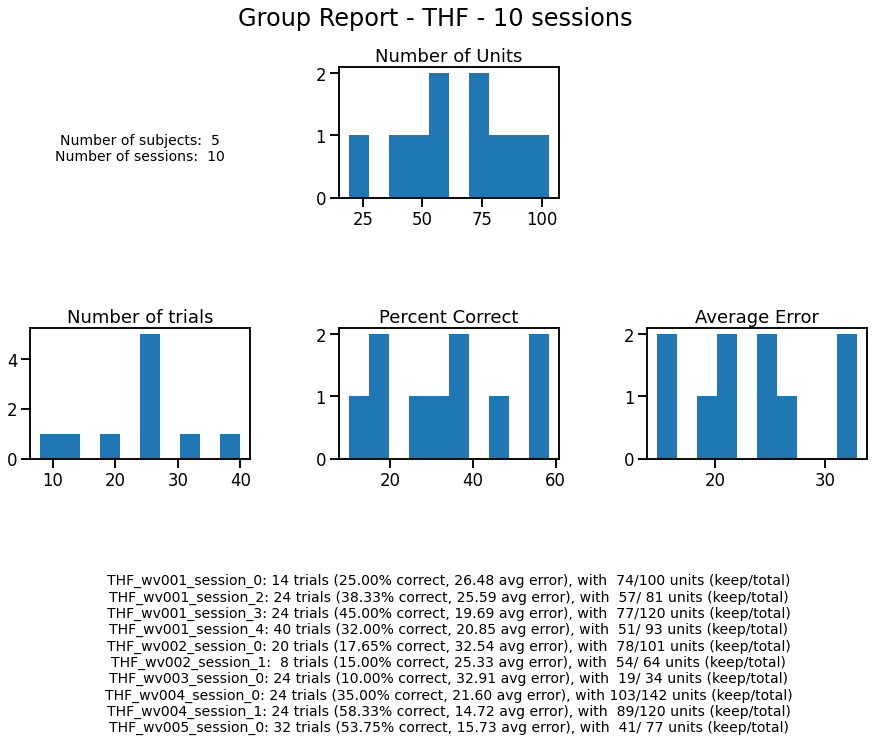

In [11]:
# Initialize figure with grid layout and add title
grid = make_grid(3, 3, wspace=0.4, hspace=1.0, figsize=(15, 12),
                 title='Group Report - {} - {} sessions'.format(experiment, len(summary['ids'])))

# 00: group text
plot_text(create_group_str(create_group_info(summary)), ax=get_grid_subplot(grid, 0, 0))

# 01: neuron firing 
plot_hist(summary['n_keep'], title='Number of Units', ax=get_grid_subplot(grid, 0, 1))

# 10-12: behavioural data
plot_hist(summary['n_trials'], title='Number of trials', ax=get_grid_subplot(grid, 1, 0))
plot_hist(summary['correct'], title='Percent Correct', ax=get_grid_subplot(grid, 1, 1))
plot_hist(summary['error'], title='Average Error', ax=get_grid_subplot(grid, 1, 2))

# 21: detailed session strings
plot_text('\n'.join(create_group_sessions_str(summary)), ax=get_grid_subplot(grid, 2, 1))